In [1]:
!git clone https://github.com/sheelfshah/banditpylib.git

Cloning into 'banditpylib'...
remote: Enumerating objects: 6611, done.
remote: Counting objects: 100% (406/406), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 6611 (delta 366), reused 340 (delta 340), pack-reused 6205
Receiving objects: 100% (6611/6611), 10.08 MiB | 29.31 MiB/s, done.
Resolving deltas: 100% (4938/4938), done.


In [2]:
%cd banditpylib

/content/banditpylib


In [3]:
!make install

pip install --upgrade pip
     |████████████████████████████████| 1.6MB 29.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip install -r requirements.txt
     |████████████████████████████████| 223 kB 40.4 MB/s 
     |████████████████████████████████| 105 kB 70.6 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 10.3 MB 62.3 MB/s 
     |████████████████████████████████| 21.5 MB 6.1 MB/s 
     |████████████████████████████████| 15.3 MB 172 kB/s 
     |████████████████████████████████| 9.9 MB 22.5 MB/s 
     |████████████████████████████████| 3.0 MB 43.9 MB/s 
     |████████████████████████████████| 1.0 MB 33.8 MB/s 
     |████████████████████████████████| 357 kB 59.7 MB/s 
     |████████████████████████████████| 280 kB 60.4 MB/s 
     |████████████████████████████████| 510 kB 59.1 MB/s 
     |████████████████████████████████| 28.5 MB 31 kB/s 
     |███████████████

In [4]:
!pip3 uninstall matplotlib
!pip3 install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1 MB 93 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 

In [5]:
with open("/content/banditpylib/banditpylib/learners/collaborative_learner/__init__.py") as f:
  print(f.read())

from .utils import *
from .lilucb_heur_collaborative import *
from .collaborative_agent import *

__all__ = ['CollaborativeLearner', 'CollaborativeAgent', 'CollaborativeMaster']



In [7]:
!git pull
!pip install -e .

Already up to date.
Obtaining file:///content/banditpylib
  Attempting uninstall: banditpylib
    Found existing installation: banditpylib 1.0.0
    Can't uninstall 'banditpylib'. No files were found to uninstall.
  Running setup.py develop for banditpylib


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

from banditpylib.arms import GaussianArm
from banditpylib.bandits import OrdinaryBandit
from banditpylib.protocols import CollaborativeLearningProtocol, SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.collaborative_learner import CollaborativeMaster
from banditpylib.learners.ordinary_fcbai_learner import ExpGap

In [2]:
confidence = 0.95
means = [0.3, 0.5, 0.7]
rounds, horizon, num_agents = 10, 100000, 5

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = OrdinaryBandit(arms=arms)
master = CollaborativeMaster(arm_num=len(arms),
    num_rounds=rounds, time_horizon=horizon, num_agents=num_agents)
trials = 20

In [4]:
game1 = CollaborativeLearningProtocol(bandit=bandit, master=master,
    rounds=rounds, horizon=horizon)
game1.play(trials=trials, output_filename="trial_outputs1.txt")

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [5]:
learners = [ExpGap(len(arms), confidence, threshold=3)]
game2 = SinglePlayerProtocol(bandit=bandit, learners=learners, horizon=horizon)
game2.play(trials=trials, output_filename="trial_outputs2.txt")

In [6]:
data_df1 = trial_data_messages_to_dict("trial_outputs1.txt")
data_df2 = trial_data_messages_to_dict("trial_outputs2.txt")

In [7]:
import pandas as pd
data_df = pd.concat([data_df1, data_df2])
data_df["confidence"] = confidence

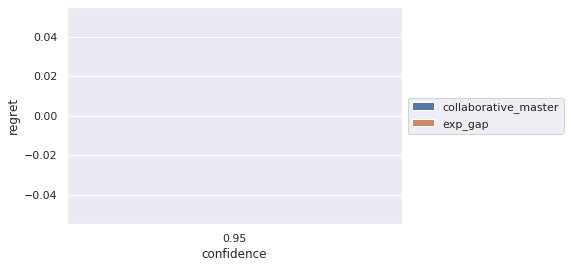

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='regret', hue='learner', data=data_df)
plt.ylabel('regret')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# both have 0 regret

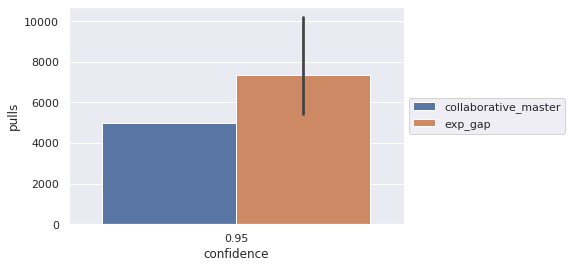

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()